In [1]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import math
from imutils.object_detection import non_max_suppression
from itertools import combinations
# print(cv2.getBuildInformation())

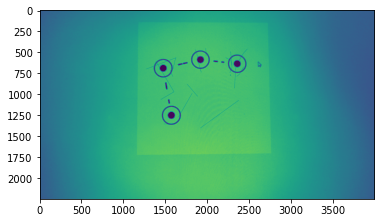

In [2]:
img = cv2.imread("test4.png",0)

# template = cv2.imread("template.png")
plt.imshow(img)

In [3]:
###
#finds detectors and returns detector contours and visualization image
###
def find_detectors(code_image,visualize = False):
    image = code_image.copy()    
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Converting to GrayScale
    blur  = cv2.blur(image,(12,12))
    tolerance = 1.5
    
    _,binary = cv2.threshold(blur,150,255,cv2.THRESH_BINARY)

    regions, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    ###
    #filtering circular contours out by comparing areas
    ###
    contour_list = []
    for i in range(len(regions)):
        (x,y),radius = cv2.minEnclosingCircle(regions[i])
        center = (int(x),int(y))
        area = math.pi*(radius**2)
        cnt_area = cv2.contourArea(regions[i],True)
        if ((cnt_area/area) < tolerance ):
            contour_list.append((regions[i],i))
     ###
     #checking contour hierarchy and filtering based on circular contour in circular contour
     ###
    hierarchy = hierarchy[0]
    final_contours_rect = []
    for (region,i) in contour_list:
        x, y, w, h = cv2.boundingRect(region)
        if(hierarchy[i][2]>0): #checking child contour of this
            if(hierarchy[(hierarchy[i][2])][2]>0): #checking child contour of this
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5)
                final_contours_rect.append((x,y,w,h))
                
    if(visualize):
        image = imutils.resize(image, width = int(image.shape[1] * 0.2))
        cv2.imshow("Image",image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return final_contours_rect


    
    

In [4]:
detector_contours = find_detectors(img,False)
print(detector_contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[(1452, 1137, 234, 233), (1356, 579, 235, 228), (2242, 526, 228, 227), (1803, 478, 228, 228)]


In [5]:
# vid = cv2.VideoCapture(0)
  
# while(True):
      
#     # Capture the video frame
#     # by frame
#     ret, frame = vid.read()
  
#     # Display the resulting frame
#     find_detectors(frame)
#     cv2.imshow("frame",frame)
#     # the 'q' button is set as the
#     # quitting button you may use any
#     # desired button of your choice
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
  
# # After the loop release the cap object
# vid.release()
# # Destroy all the windows
# cv2.destroyAllWindows()

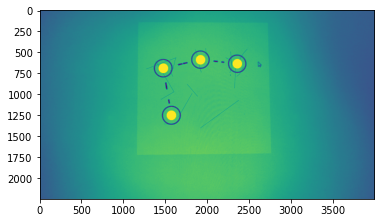

In [6]:
centers=[]
clone = img.copy()
for (x,y,w,h) in detector_contours:
	
	temp = (int((x+x+w)/2), int((y+y+h)/2))
	clone = cv2.circle(clone, temp, int(0.5*(w/2)), (255,255,255), -1)
	centers.append(temp)
plt.imshow(clone)

In [7]:
print(centers)


def find_perspective(x1,y1,x2,y2,image1):
    perspective_frame = (5000,400)
    width = 1
    point1 = [x1+width*perpendicular[0],y1+width*perpendicular[1]]
    point2 = [x2+width*perpendicular[0],y2+width*perpendicular[1]]
    point3 = [x1-width*perpendicular[0],y1-width*perpendicular[1]]
    point4 = [x2-width*perpendicular[0],y2-width*perpendicular[1]]


    points = np.float32([point1,point2,point3,point4])
    paper = np.float32([[0,0],[perspective_frame[0],0],[0,perspective_frame[1]],[perspective_frame[0],perspective_frame[1]]])
    M = cv2.getPerspectiveTransform(points,paper)
    dst = cv2.warpPerspective(image1,M,perspective_frame)
    _,dst = cv2.threshold(dst,20,255,cv2.THRESH_BINARY)
    plt.figure()  
    plt.imshow(dst,cmap="gray")

    return dst

[(1569, 1253), (1473, 693), (2356, 639), (1917, 592)]


In [8]:
def binary_to_string(decoded):
    ascii_string = ""
    an_integer = int(decoded, 2)
    ascii_character = chr(an_integer)
    ascii_string += ascii_character
    return ascii_string

In [9]:

def decode(perspective_in_code):
    code = perspective_in_code[0]

    for i  in range(len(code)-1):
        if(code[i] ==0 and code[i+1] == 255):
            code = code[i+1:len(code)-1]
            break

    for i in range(len(code)-1, 0, -1):
        if(code[i] == 0 and code[i-1] == 255):
            code = code[0:i-1]
            break

    step_size = int(len(code)/8)
    ans =[]
    for i in range(8):
        temp = np.mean(code[i*step_size:(i+1)*step_size])
        ans.append(temp)

    decoded = ""
    for i in ans:
        if(i<150):
            decoded+=("1")
        else:
            decoded+=("0")
    

    final_char = binary_to_string(decoded)

    return final_char


F
 
 
 
<
,


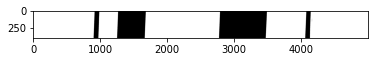

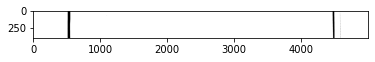

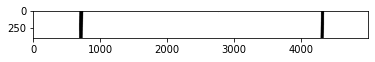

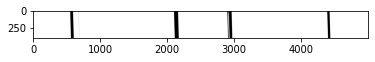

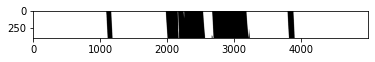

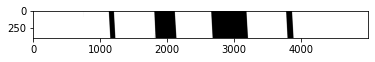

In [10]:
for combo in combinations(centers,2):
    # print(combo)
    x1,y1 = combo[0]
    x2,y2 = combo[1]
   
    mag = math.sqrt((x2-x1)**2+(y2-y1)**2)
   
    line = (((x2-x1))/mag,((y2-y1))/mag)
   
    perpendicular = (line[0],-1*line[1])
   
    perspective = find_perspective(x1,y1,x2,y2,clone)
   
    answer = decode(perspective)
    
    print(answer)

# print(mag,line,perpendicular)



